# 1. Try to run the code from the project 2 example below that is associated with your track. Upload the a knitted PDF file here with the final code recapitulated. (13 points)

# Project 2 Example (This example would earn an A+)

### Scientific Question: Are the Torpediniformes and Rajiformes families' development of the electric organ phenotypic characteristic originate from the same expression of genes as the species from the Mormyroidea, Siluriformes, and Gymnotiformes families, which have been founded by Gallant in 2014? [10 points for specific, measurable, and clear scientific question]



[ 10 points for background on the protein of interest, background on the inhibitors, and description of the database used for this project. NOTE, this isn't a bioinformatics project but a cheminformatics project, so it is using methodology not really covered in the course - this is so you can get an idea of the structure of the jupyter notebook without having a complete blueprint for project 2]


### Scientific Hypothesis: If the Torpediniformes and Rajiformes families' development of the electric organ did not originate from the same gene expression as the Mormyroidea, Siluriformes, and Gymnotiformes families, then there is a difference in gene expression in either upregulation of the collagen genes, hey1 or six2a nuclear transcription factor, genes associated with the ion pumps or cell size; or downregulation of contraction factors. [10 points for specific, measurable, and clear scientific hypothesis]



[10 points for description of what analyses were done and how the data was downloaded for the project]

#### Part 1: Load the Packages

Packages loaded include the following (For the full 25 points here I would have to correctly define these in your own words - at least 3 packages needed to be used and at least 5 sentences per package with links to resources to the packages need to be included, but I will not do that here for all of the packages as these definitions are up to you!):

* Pandas: <br>


* Numpy: <br>


* SciPy: <br>


* pubchempy: PubChem is a database that stores compounds. PubChemPy is a python package that allows scientists to interact with the compounds from PubChem in a python interface. Some of the tools available in pubchempy include the ability to search for chemical structures by name, substructures, similarity, and retrieval of chemical properties. Here it is used to retrieve fingerprints from an SDF file and turn the information from a SDF file to a Pandas dataframes. To learn more about pubchempy, see: https://pubchempy.readthedocs.io/en/latest/ <br>


* rdkit: This is a open source toolkit for performing cheminformatics analyses. Compounds can be read in in 2D or 3D, and multiple operations can be performed on compounds in 2D or 3D. You can search for substructures, read and write molecules, perform maximum common substructure analyses and more. To learn more about RDKit see the documentation page here: https://rdkit.org/docs/index.html <br>


* matplotlib: <br>


* IPython.display: <br>


* os: <br>


* itertools: <br>


* nglviewer: <br>


* mols2grid: This is a package that is actually built based on rdkit. It is a package that enables scientists to view the chemical structures in an interactive way within a Jupyter Notebook. There are multiple input parameters that you can specify, including removing hydrogens, the size of the compounds, and what data you want to input from the SDF file. To learn more about mols2grid, see the GitHub page: https://github.com/cbouy/mols2grid

#### Part 2: Load in the data and perform Bioinformatics Analyses (RDKit Fingerprint & Similarity Analyses)


[Description is given of the type of data loaded in and the Bioinformatics analysis being performed - 10 points] SDF file is a structure data file that contains information about how atoms are arranged in space relative to one another, by giving coordinates for each atom in x, y and z direction. Molecular fingerprints are 2D descriptors of a 3D chemical structure, and the connectivity between atoms. Molecular fingerprints can be compared to the sequence of atoms in the 2D string.

In the code below, we read in molecules from an SDF file, and then turn these 3D molecules into molecular fingerprints. Use itertools to iterate through all of the molecular pairs to calculate the Fingerprint similarities between each molecule to store in the matrix fps_sim_matrix.

In [26]:
# read in molecular data from the sdf that was saved from the PubChem website
# Define the global variable m (10 points for labeling all global variables)
m = Chem.SDMolSupplier('PubChem_compound_text_PI3K inhibitor_records.sdf')

# Get the number of molecules in the sdf file
# Define the global variable SDFFile
SDFFile = "PubChem_compound_text_PI3K inhibitor_records.sdf"

# use of built in rdkit function PandasTools.LoadSDF (similar to biopython)
# Reads in an SDF file and returns a pandas dataframe of the data for
# each compound.
# define a global variable PI3KLigs
PI3KLigs = PandasTools.LoadSDF(SDFFile)
# define a global variable lig_len
lig_len = len(PI3KLigs)

# check that the file is loaded correctly by uncommenting the line below
# this is a code check
print(PI3KLigs)

   PUBCHEM_COMPOUND_CID PUBCHEM_CONFORMER_RMSD  \
0              71317162                    0.6   
1               1893730                    0.8   
2              49867926                    1.4   
3             137661516                    0.8   
4             118616775                    0.8   
5              53483920                    1.4   
6             121428416                      1   
7              54575456                      1   
8              44123663                      1   
9              12997487                    0.6   
10               869810                    0.6   
11              6852167                    0.8   
12             44599690                    1.4   
13             53378051                    1.2   
14             53394675                    0.6   
15             91933883                      1   

                       PUBCHEM_CONFORMER_DIVERSEORDER  \
0                                       1\n5\n4\n2\n3   
1   1\n117\n173\n220\n64\n144\n194\

#### Part 3A: Create a heatmap (plotting method) to show the Fingerprint similarity scores (bioinformatics method) between all compounds in the set. HERE similarity scores are like protein sequence alignments but for compound structure.

A heatmap is a plotting method that colors the levels of some feature that can be defined by two inputs. In this case, the two inputs are two of the potential compounds from the entire list of 16 compounds. The colors here are showing the level of chemical similarity between the two inputs

In [27]:
# Save the molecules as fingerprints and save to the variable fps.
# Write the conversion as a function [15 points]

def Molecules2FingerPrints(molecules):
   
    # Create an RDKit similarity matrix, a function that reads in the 
    # molecules from the SDF Molecular Data type and turns these 
    # SMILES strings into molecular fingerprint.
    # define a local variable fps
    fps = [Chem.RDKFingerprint(x) for x in molecules]
    # Check the data store in fps by uncommenting the line below
    # print(fps) 10 points for code checks!
    # Create an empty matrix the right size for us to populate
    # Empty is a function that creates an empty numpy array.
    # define a local variable fps_sim_matrix
    fps_sim_matrix = np.empty(shape=(lig_len, lig_len))

    # Run a for-loop over each pair of compounds in fps to compute their chemical similarities
    # uses the range function to create an array of length lig_len
    # with each cell starting from 0 counting up to the length you specify.
    for i, j in itertools.product(range(lig_len), range(lig_len)):
    
        # To check that the for loop is correctly iterating over each of the compounds uncomment the line below
        #print(DataStructs.FingerprintSimilarity(fps[i],fps[j])) - 10 points for code checks
        fps_sim_matrix[i,j] = DataStructs.FingerprintSimilarity(fps[i],fps[j])

    # To check that the for loop correctly created a matrix of similarity score print the matrix by uncommenting the line below
    return(fps_sim_matrix)

# Define a global variable Similarity Matrix based on the function defined
# above. 
Similarity_Matrix = Molecules2FingerPrints(m)
print(Similarity_Matrix)
#[Code works correctly is 15 points, Code is commented well,succinct and includes code checks is 10 points]

[[1.         0.3088685  0.33451202 0.34217172 0.34035326 0.33310392
  0.33951026 0.32496782 0.37478608 0.33993174 0.18558736 0.29640499
  0.33130904 0.36693017 0.49330587 0.34969697]
 [0.3088685  1.         0.70355078 0.40451495 0.40733464 0.67565424
  0.37931034 0.37792848 0.41543514 0.37644788 0.16596105 0.35779175
  0.36617928 0.41394472 0.24407039 0.40855803]
 [0.33451202 0.70355078 1.         0.45791642 0.45705329 0.92917369
  0.42642643 0.44571086 0.48042895 0.41269841 0.17575758 0.39342105
  0.44527363 0.46941248 0.29289304 0.46894587]
 [0.34217172 0.40451495 0.45791642 1.         0.46457143 0.46662797
  0.49286122 0.50768355 0.58227848 0.44892168 0.18687873 0.40632458
  0.48752176 0.49887514 0.29441624 0.53682488]
 [0.34035326 0.40733464 0.45705329 0.46457143 1.         0.47361887
  0.45707519 0.46823529 0.52490627 0.44057623 0.18096611 0.42285345
  0.44311377 0.46643316 0.29246575 0.48743719]
 [0.33310392 0.67565424 0.92917369 0.46662797 0.47361887 1.
  0.43916914 0.4608076  0

#### Part 3B: Show the ligand structures and associated data from PubChem (bioinformatics method) for all compounds in the set. HERE ligand structures are like protein structures but for compounds.

Below we are using the method mols2grid to view the structures of the ligands identified from PubChem. It is important for us to be able to visually inspect the structures so that we can make sense of the similarity score matrix below. Mols2grid takes an SDF file, and then turns it into a pandas dataframe with a column of SMILES string as the keys.

In [29]:
mols2grid.display('PubChem_compound_text_PI3K inhibitor_records.sdf',
                 fixedBondLength=25)

[Description of data analysis method described clearly - 10 points] Here we are using matplotlib to create a plot that will be printed out below. The x and y axes will be labeled based on the values in the list "cpds". The color bar is added, X and y axis ticks are added, and the plot is saved and displayed. Heatmaps are a data visualization technique for viewing the magnitude of phenomenon as a color out of a gradient of colors. Heatmaps are 2D graphs and can often be used to show the relative amount of a substance, or in this case, the similarity scores between all data points compared. This sort of plot could be used to compare the alignment scores between a set of sequences, and here it is used to compare the similarity scores between all compounds in a set.

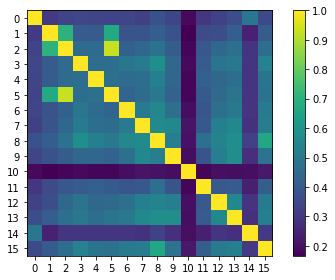

In [30]:
# 5 points for adequate commenting
# Set a figure and ax varialbe equal to plt.subplots()
fig, ax = plt.subplots()

# Instruct the heat map to show the axes
im = ax.imshow(Similarity_Matrix)

# Add a colorbar to the right of the heatmap
cbar = ax.figure.colorbar(im)

# Actually show the heatplot
plt.imshow(Similarity_Matrix)

# Set the X-axis & Y-Axis ticks
ax.set_xticks(np.arange(lig_len))
ax.set_yticks(np.arange(lig_len))

# Indicate how the tick labels are going to be displayed on the x-axis

# Save a PNG file with the heatmap 
plt.savefig('Compound_similarity_Pi3k.png')

# Show the heatmap
fig.tight_layout()
plt.show()

#[Code works - 2 points, and Code is well commented - 2 points]

#### Part 4: Analysis of the results


[25 points for correctly analyzing the data] The plot above shows the similarities between all compounds in the set. The first ligand is the ligand that was identified from the protein data bank (PDB: 2OH4). The other compounds were downloaded from the PubChem. Compounds that are similar to one another have a higher FingerPrint Similarity score (closer to 1.0 & yellow) and those that are less similar to one another have a lower FingerPrint Similarity score (closer to 0.4 & purple). Each cell in the matrix represents a similarity score. The diagonal are all yellow because these are comparing the similarity between a compound and itself. There are three compounds that are more similar to one another, labeled 1, 2, 3 in the heatmap above. The remainder of compounds are less than 0.7 similarity and two compounds, are less that 0.5 tanimoto similarity to all the other compounds. If we look at the compounds structure, these similarities make sense in that each of these compounds have unique structure types. Yet despite this visual clustering, there are potent compounds (all with IC50s less than 0.01 uM) in both sets of compounds. Thus, my hypothesis was correct and there was not one cluster of compounds that was necessarily more potent than others.

# 2. What questions do you have about the rubric - you need to ask questions here for points (2 points)?



1. For the analyzing the results section, can we follow the way the sample code has it where they just talks about the results and how it answered their hypothesis? Or do we have to also further propose more further research design like other peer reviewed research articles? I only ask this as the rubric only has 15 points for analyzing the results correctly.

2. For defining packages, do we have to define known packages that were learned from DataCamp, such as numpy, pandas, matpltlib? In the example they only defined new packages that were not learned within DataCamp.

3. For commenting on code, what is considered adequate commenting? I like to comment a general comment only in areas that may not be familiar like in a new function. But do I have to comment on like things that are common knownledge from DataCamp such as "# importing packages ...". Would it be prefered to have comments that comment on every line on code?

4. Do you want code checks to be left in? I think this is a style method, but I prefer to remove my print statements where I check my code so that I minimize the amount of codes line.